<a href="https://colab.research.google.com/github/pritam-banik-roy/eCommerce_Data_Analysis/blob/main/Pritam_Banik_Roy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Exploratory Data Analysis (EDA) and Business Insights**

#**Step 1: Load the Data**


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

# **Step 2: Clean the Data**

In [ ]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Drop duplicates
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# **Step 3: Exploratory Data Analysis**

## 1. Customer Analysis

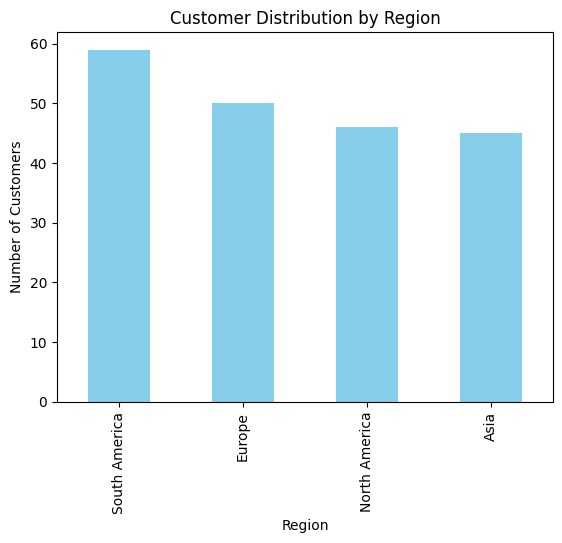

In [ ]:
# Count of customers by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Distribution by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


## **2. Product Analysis**

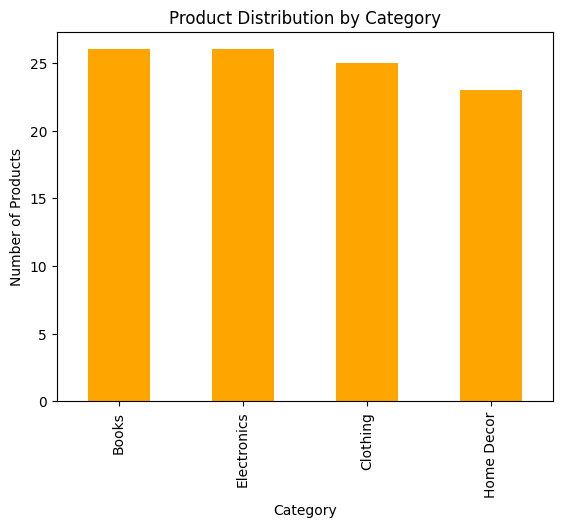

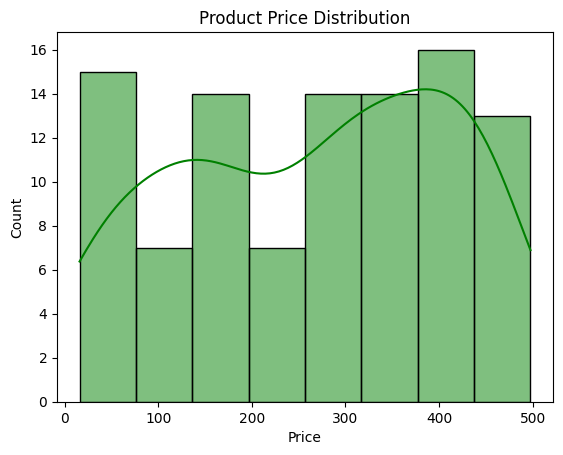

In [ ]:
# Count of products by category
category_counts = products['Category'].value_counts()
category_counts.plot(kind='bar', title='Product Distribution by Category', color='orange')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# Price distribution
sns.histplot(products['Price'], kde=True, color='green')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.show()


## **3. Transaction Analysis**

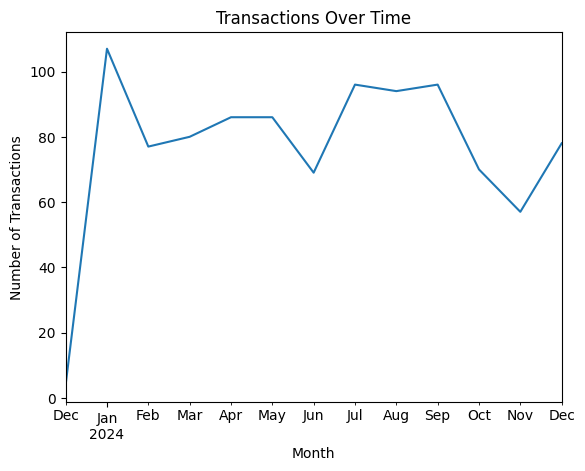

             ProductName  Quantity
0        SoundWave Jeans        46
1     SoundWave Cookbook        46
2     TechPro Headphones        45
3         ActiveWear Rug        43
4    HomeSense Desk Lamp        43
5  ActiveWear Smartphone        43
6       TechPro Cookbook        43
7        HomeSense Novel        39
8      ActiveWear Jacket        38
9    HomeSense Desk Lamp        38


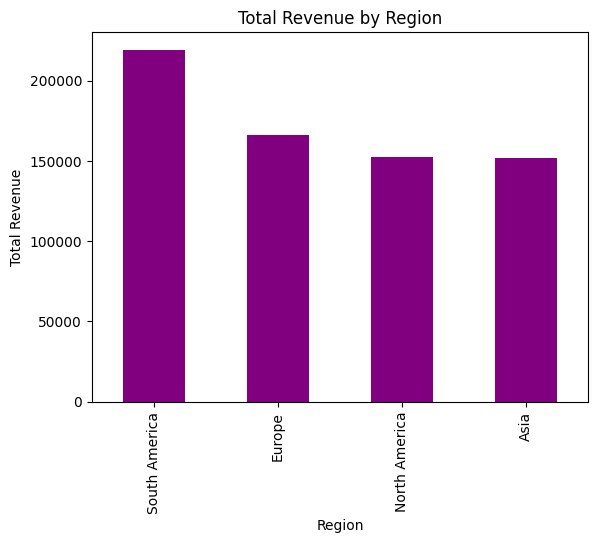

In [ ]:
# Transactions over time
transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Top products by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = top_products.merge(products, on='ProductID', how='left')
print(top_products[['ProductName', 'Quantity']])

# Total revenue by region
merged = pd.merge(transactions, customers, on='CustomerID')
revenue_by_region = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
revenue_by_region.plot(kind='bar', title='Total Revenue by Region', color='purple')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()
